In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('haberman.csv')
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Basic Overview of Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Total: 306 DataPoints 

Number of Features : 4

Name of Features : Age , Year , Nodes, Status

All of the features are of numeric type

In [5]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
print('Shape of Dataset: ',data.shape)
print('Columns names of Dataset: ',data.columns)

Shape of Dataset:  (306, 4)
Columns names of Dataset:  Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Here the status denotes the following:

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

# Scatter Plots

Text(0, 0.5, 'Nodes')

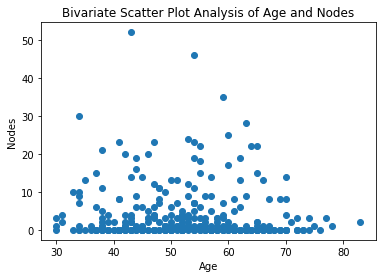

In [10]:
plt.scatter(data['age'].values , data['nodes'].values)
plt.title('Bivariate Scatter Plot Analysis of Age and Nodes')
plt.xlabel('Age')
plt.ylabel('Nodes')

Text(0, 0.5, 'Nodes')

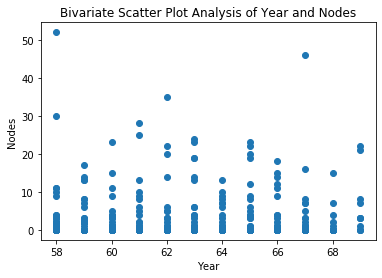

In [11]:
plt.scatter(data['year'].values , data['nodes'].values)
plt.title('Bivariate Scatter Plot Analysis of Year and Nodes')
plt.xlabel('Year')
plt.ylabel('Nodes')

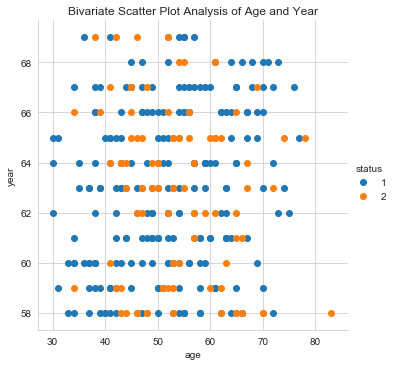

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", height = 5).map(plt.scatter, "age", "year").add_legend()
plt.title('Bivariate Scatter Plot Analysis of Age and Year')
plt.show()

It's very hard to get any kind of insights of the data using scatter plots

# Pair Plots

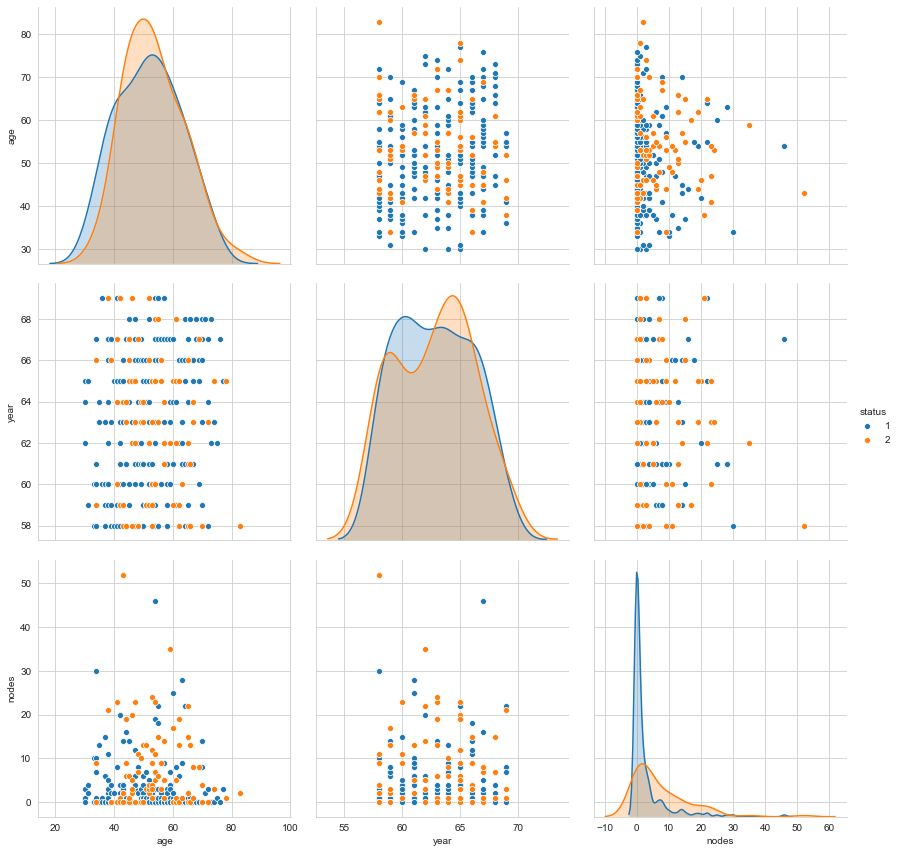

In [22]:
sns.pairplot(data,vars=['age', 'year' , 'nodes' ] , hue='status', height = 4)
plt.show()

1.) We can obsereve from here that PDF for features age and year are almost overlapping and very difficult to differentiate      between status of patients provided these Features.

2.) While if we observe the PDF of nodes feature we can oberve that patient having zero nodes have much higher probability to fall under status 1 category , while as the number of nodes increases probabilty of pateint to fall under status 1 category increases.

# Probability Density Function (PDF)

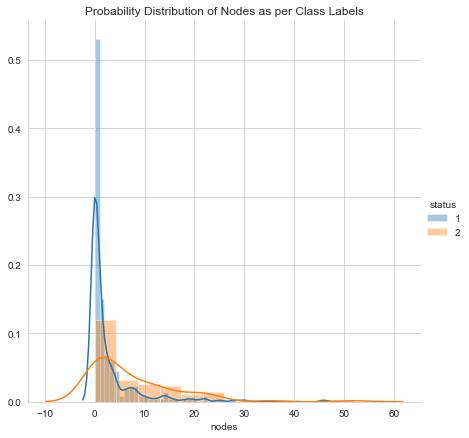

In [14]:
sns.FacetGrid(data, hue='status', height = 6).map(sns.distplot,'nodes').add_legend();
plt.title('Probability Distribution of Nodes as per Class Labels')
plt.show()

Same obeservation could be followed as earlier which is that patient having zero nodes have much higher probability to fall under status 1 category , while as the number of nodes increases probabilty of pateint to fall under status 1 category increases.

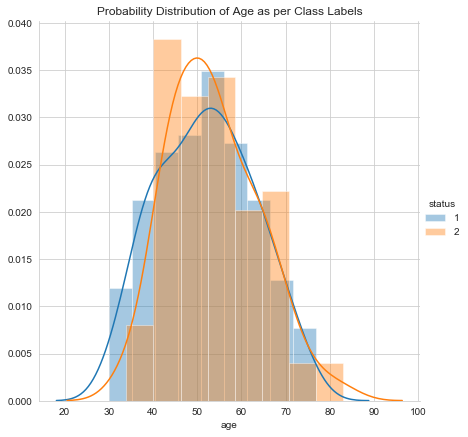

In [15]:
sns.FacetGrid(data, hue='status', height = 6).map(sns.distplot,'age').add_legend();
plt.title('Probability Distribution of Age as per Class Labels')
plt.show()

We could observe that for the entire range of age it's very difficult to build a model which could differentitae the patients status category provided only age feature since, the PDF of age features almost overlaps for both the status over entire range

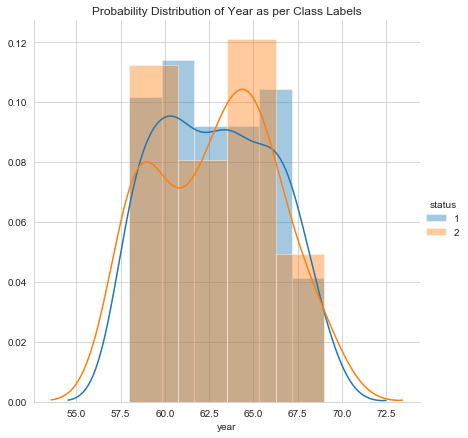

In [16]:
sns.FacetGrid(data, hue='status', height = 6).map(sns.distplot,'year').add_legend();
plt.title('Probability Distribution of Year as per Class Labels')
plt.show()

Even for this case,We could observe that for the entire range of year it's very difficult to build a model which could differentitae the patients status category provided only year feature since, the PDF of year feature almost overlaps for both the status over entire range

# Cummulative Density Function (CDF)

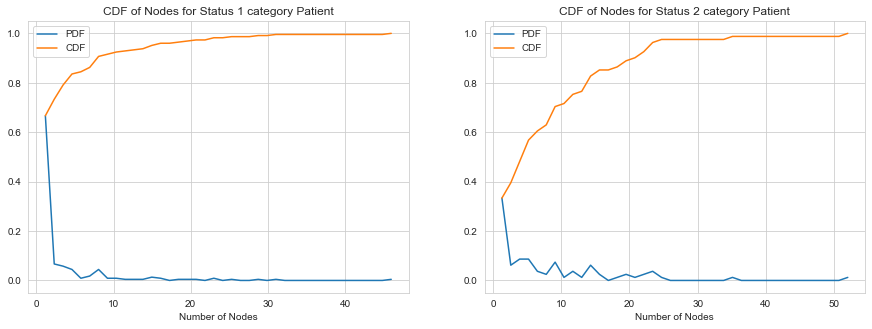

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts, bin_edges = np.histogram(data.nodes[data.status == 1], bins=40, density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label = 'PDF')
plt.plot(bin_edges[1:], cdf , label = 'CDF')
plt.legend()
plt.title('CDF of Nodes for Status 1 category Patient')
plt.xlabel('Number of Nodes')
plt.subplot(1,2,2)
counts, bin_edges = np.histogram(data.nodes[data.status == 2], bins=40, density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label = 'PDF')
plt.plot(bin_edges[1:], cdf , label = 'CDF')
plt.legend()
plt.title('CDF of Nodes for Status 2 category Patient')
plt.xlabel('Number of Nodes')
plt.show()

Both CDF and PDF are high for status 1 category patients for low values of Nodes as compared to that of status 2 category patients. Also we observe that after number of nodes crosses 10 the probabilty of the patient to belong from status 1 category almost becomes zero , while in this case the patients still have some probabilty to belong to status 2 category

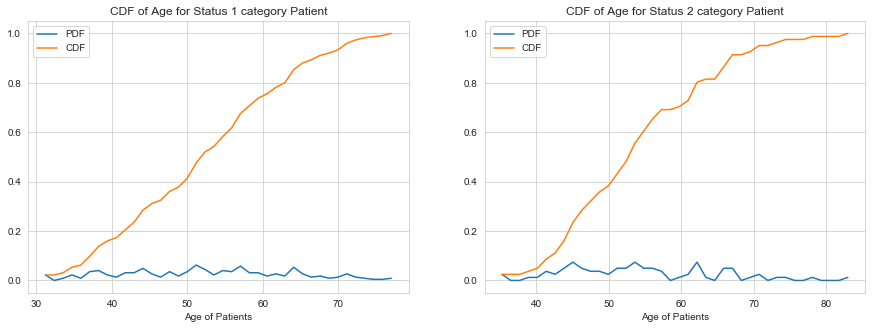

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts, bin_edges = np.histogram(data.age[data.status == 1], bins=40, density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label = 'PDF')
plt.plot(bin_edges[1:], cdf , label = 'CDF')
plt.legend()
plt.title('CDF of Age for Status 1 category Patient')
plt.xlabel('Age of Patients')
plt.subplot(1,2,2)
counts, bin_edges = np.histogram(data.age[data.status == 2], bins=40, density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label = 'PDF')
plt.plot(bin_edges[1:], cdf , label = 'CDF')
plt.legend()
plt.title('CDF of Age for Status 2 category Patient')
plt.xlabel('Age of Patients')
plt.show()

Both PDF and CDF goes almost smoothly for both the status over the entire range of Age of patients. This gives us the obervation the patients of any age group could fall in either in status 1 or status 2 category

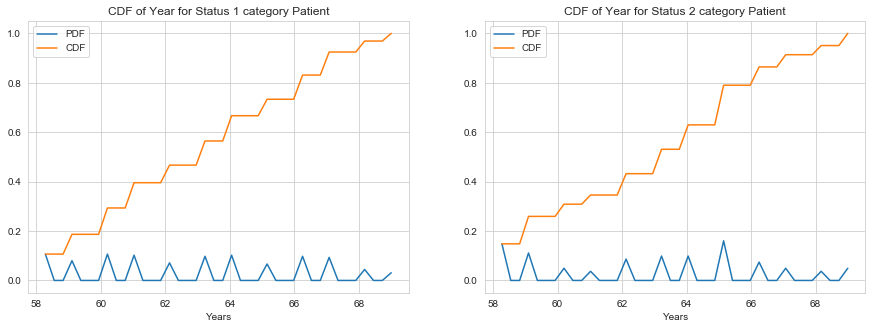

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts, bin_edges = np.histogram(data.year[data.status == 1], bins=40, density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label = 'PDF')
plt.plot(bin_edges[1:], cdf , label = 'CDF')
plt.legend()
plt.title('CDF of Year for Status 1 category Patient')
plt.xlabel('Years')
plt.subplot(1,2,2)
counts, bin_edges = np.histogram(data.year[data.status == 2], bins=40, density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label = 'PDF')
plt.plot(bin_edges[1:], cdf , label = 'CDF')
plt.legend()
plt.title('CDF of Year for Status 2 category Patient')
plt.xlabel('Years')
plt.show()

In case of Year feature we could see that the PDF and CDF behaves very randomly over the entire range for both status 1 and status 2 category patients and it'll will be very difficult to gain any type of insights through this data feature

# Box Plot and Violin Plot

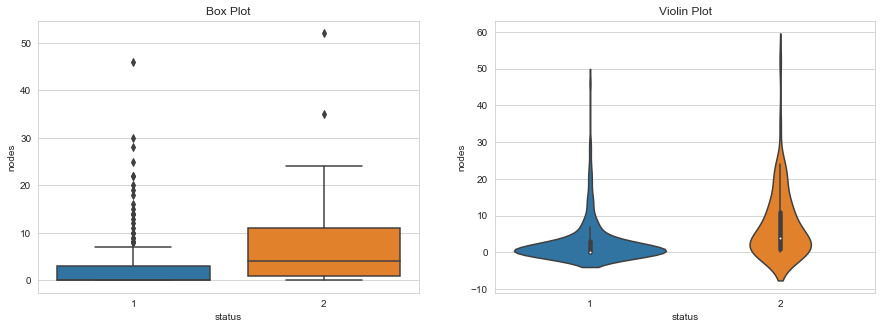

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='status',y='nodes', data=data)
plt.title('Box Plot')
plt.subplot(1,2,2)
sns.violinplot(x='status', y='nodes', data=data)
plt.title('Violin Plot')
plt.show()

Box Plot : Through Box Plot we observe that most value of nodes for status 1 category patients lies between 0 and 4 while most values of nodes for status 2 category patients lies between 1 and 12.

Violin Plot : Also violin plot shows that the distribution of nodes in case of status 1 category patients is more peaked i.e, most of the values lies in a small range , while status 2 category patients have more spread in there distributions which means the values lies over a wide range as compared to status 1 category

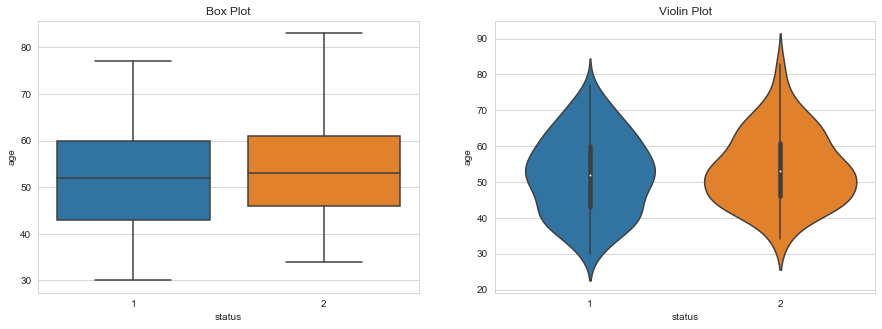

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='status',y='age', data=data)
plt.title('Box Plot')
plt.subplot(1,2,2)
sns.violinplot(x='status', y='age', data=data)
plt.title('Violin Plot')
plt.show()

Both the Box Plot and Violin Plot values overlaps for feature age in such a manner that its very difficult to get a statistical insights about the task of classifiying patients into status 1 and status 2 category

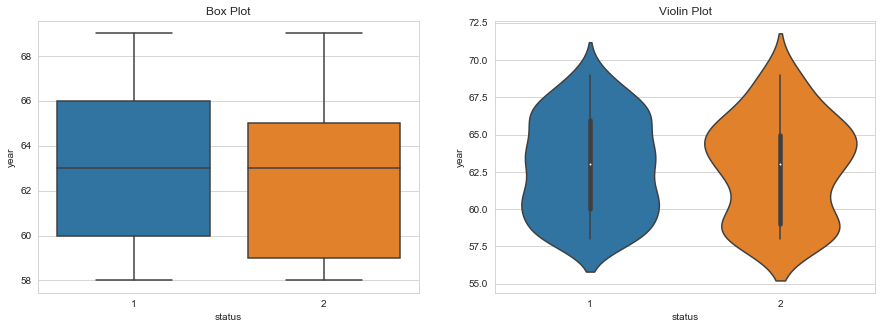

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='status',y='year', data=data)
plt.title('Box Plot')
plt.subplot(1,2,2)
sns.violinplot(x='status', y='year', data=data)
plt.title('Violin Plot')
plt.show()

Both the Box Plot and Violin Plot values overlaps for feature year in such a manner that its very difficult to get a statistical insights about the task of classifiying patients into status 1 and status 2 category

# Conclusions:

As per the Analysis performed above we could come to following conclusions:

1.) Feature Importance Rank:

a.) Rank 1: Nodes : The most impoartant feature in order to distinguish between status 1 and status 2 category paitents         
b.) Rank 2: Age : This feature is almost have a similar distribution over the entire range                                     
c.) Rank 3: Year : This Feature has a very random Behaviour over the entire range , which makes it unpredictable

2.) Range of Features:

a.) Nodes : The range for status 1 category patients is pretty small and most of them lies between 0 to 4 while the range for               status 2 category feature is wide           as compared to status 1 and lies and most of them lies in between 1 to 12         
b.) Age : The range over for both status 1 and status 2 category patients is almost same and cdf goes smoothly over the entire           range                                                                                                                 
c.) Year : Range of year for status 1 and status 2 category is very wide and the pdf and cdf behaves very randomly over the                entire range